In [3]:
import csv
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import imageio

# Happy FRS

In [4]:
first = np.loadtxt("happyfrsfirst.csv", delimiter=",")
display(first)

second = np.loadtxt("happyfrssecond.csv", delimiter=",")
display(second)

third = np.loadtxt("happyfrsthird.csv", delimiter=",")
display(third)

array([[ 5.17150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 5.18150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 5.19150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.71415000e+02, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.71515000e+02, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.71615000e+02, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00]])

array([[ 5.17150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.18150000e+01, -1.55407044e-02,  3.28876411e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.19150000e+01,  2.20374170e-03,  5.04978098e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 6.25150000e+01,  1.90000040e+00,  1.90000040e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.26150000e+01,  1.95000040e+00,  1.95000040e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.27150000e+01,  2.00000000e+00,  2.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

array([ 5.17150000e+01, -4.99996282e-02,  3.72529030e-07,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

[2. 2.]
[[-35. -35.]
 [-35. -35.]]
[-4.99996282e-02  3.72529030e-07]
[[1. 0.]
 [0. 1.]]


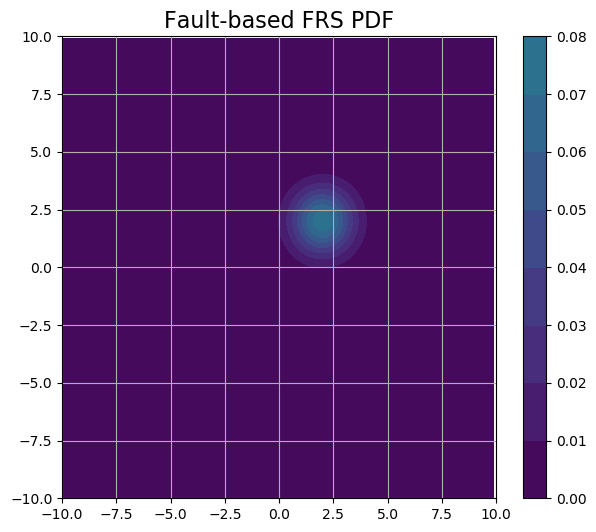

In [5]:
# Visualize setup
fig, ax = plt.subplots(figsize=(7,6))
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.grid()

ts = third[0]
viz = np.mgrid[-10:10:.1, -10:10:.1]
print(second[-1,1:3])
print(np.vstack((second[-1,5:7],second[-1,9:11])))
no_fault = multivariate_normal(mean=second[-1,1:3], cov=np.eye(2))
print(third[1:3])
print(np.vstack((third[5:7],third[9:11])))
fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
#img = (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1]))) #+ \
#      (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1]))) + (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1])))
img = (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1])))
plt.contourf(viz[0],viz[1],img, vmin=0,vmax=.2)
plt.colorbar()
ax.set_title("Fault-based FRS PDF", fontsize=16)

plt.show()

In [21]:
print(third[1:3])
print(np.vstack((third[5:7],third[9:11])))
fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
print(fault.cdf(np.array([1,1])))
print(fault.cdf(np.array([-1,-1])))
print(fault.cdf(np.array([1,1]))-fault.cdf(np.array([-1,-1])))

[-4.99996282e-02  3.72529030e-07]
[[1. 0.]
 [0. 1.]]
0.717785501764212
0.027138922751031403
0.6906465790131806


In [26]:
def gen_frame(j):
    # Visualize setup
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    ax.grid()

    ts = second[j,0]
    viz = np.mgrid[-5:5:.1, -5:5:.1]
    no_fault = multivariate_normal(mean=second[j,1:3], cov=np.eye(2))
    fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
    img = (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1])))
    plt.contourf(viz[0],viz[1],img,vmin=0,vmax=.15)
    ax.set_title("Intent-based FRS PDF", fontsize=16)
    plt.colorbar()

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close("all")
    print(j)
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
#final version should be 90x160px
imageio.mimsave('./intentfrs.gif', [gen_frame(j) for j in range(len(second))], fps=20) #len(Ps[:,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


# Calibration

In [30]:
calodom = np.loadtxt("diditwork.csv", delimiter=",")
display(calodom.shape)

caltraj = np.loadtxt("caltrajtest.csv", delimiter=",")
display(caltraj.shape)

calsplit = np.loadtxt("calsplittest.txt", delimiter=",")
display(calsplit.shape)

deets = np.loadtxt("simdeetstest.csv", delimiter=",")
display(deets.shape)

(2, 1200)

(4, 400)

(2,)

(6, 6)

In [49]:
sim = 1

fig, ax = plt.subplots(figsize=(7,6))
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.grid()

ind = np.where(calodom[sim*2,:]!=0)
print(ind[0][-1])
plt.plot(calodom[sim*2,:ind[0][-1]],calodom[sim*2+1,:ind[0][-1]])
for obs in range(3):
    ax.add_patch(plt.Circle((deets[sim*2,obs*2],deets[sim*2,obs*2+1]), 1, color='r'))
    print((deets[sim*2,obs*2],deets[sim*2,obs*2+1]))
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

In [151]:
n_sim = 3
normdata = np.zeros((3,100,2))
covslists = []

for i in range(n_sim):
    for sim in range(i):
        for t in range(100):
            trajx = caltraj[sim*2,round(t*.01*calsplit[sim])]
            trajy = caltraj[sim*2+1,round(t*.01*calsplit[sim])]
            odomx = calodom[sim*2,round(t*3*.01*calsplit[sim])]
            odomy = calodom[sim*2+1,round(t*3*.01*calsplit[sim])]
            normdata[sim,t] = (np.array([trajx,trajy]) - np.array([odomx,odomy]))
    covs = []
    for t in range(100):
        current = normdata[:,t,:]
        covs.append(np.cov(current.T,ddof=0))
    covslists.append(np.array(covs))
    
covslists = np.array(covslists)

linedata = np.zeros((3,100,2))
covslistsline = []
dur = []

for i in range(n_sim):
    dur.append(np.sum(np.where(caltraj[i*2]!=0,1,0)))
    for sim in range(i):
        for t in range(100):
            trajx = caltraj[sim*2,int(calsplit[sim]+t*dur[-1]*.01)]
            trajy = caltraj[sim*2+1,int(calsplit[sim]+t*dur[-1]*.01)]
            odomx = calodom[sim*2,int(calsplit[sim]+t*3*dur[-1]*.01)]
            odomy = calodom[sim*2+1,int(calsplit[sim]+t*3*dur[-1]*.01)]
            linedata[sim,t] = (np.array([trajx,trajy]) - np.array([odomx,odomy]))
    covs = []
    for t in range(100):
        current = linedata[:,t]
        covs.append(np.cov(current.T,ddof=0))
    covslistsline.append(np.array(covs))
    
covslistsline = np.array(covslistsline)

In [152]:
print(covslists[-1,:,0,0])
print(covslistsline[-1,:,0,0])

[6.32603003e-11 6.32603003e-11 6.32603003e-11 8.81631546e-03
 8.81631546e-03 8.81736834e-03 8.81736834e-03 8.75058966e-03
 8.75058966e-03 8.75058966e-03 8.75058966e-03 8.72830207e-03
 8.72830207e-03 8.72830207e-03 8.72830207e-03 1.25721220e-02
 1.25721283e-02 1.25799570e-02 1.25799570e-02 1.97609392e-02
 1.97609392e-02 1.97609392e-02 1.97609392e-02 3.02633063e-02
 3.02633063e-02 3.02633063e-02 3.02633063e-02 3.02633063e-02
 3.80371669e-02 3.80371669e-02 3.80371669e-02 3.80371669e-02
 4.32180501e-02 4.32180501e-02 4.32180501e-02 4.32180501e-02
 3.95572926e-02 3.95572926e-02 3.95572926e-02 3.95574403e-02
 2.97408472e-02 2.97408472e-02 2.97408472e-02 2.97408472e-02
 1.59661820e-02 1.59661820e-02 1.59661820e-02 1.59661820e-02
 5.75284614e-03 5.75284614e-03 5.74825416e-03 5.74825416e-03
 5.74825416e-03 2.39015175e-03 2.39015175e-03 2.39015175e-03
 2.39015175e-03 1.27076221e-03 1.27076221e-03 1.27076221e-03
 1.27076221e-03 1.04720076e-03 1.04720076e-03 1.04720076e-03
 1.04720076e-03 1.015044

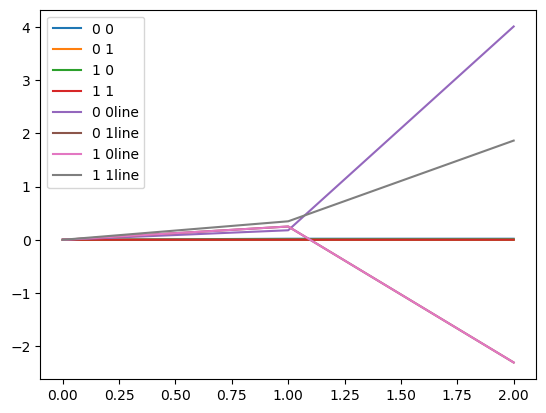

In [154]:
plt.figure()
for i in range(2):
    for j in range(2):
        plt.plot(covslists[:,20,i,j],label=str(i)+" "+str(j))
for i in range(2):
    for j in range(2):
        plt.plot(covslistsline[:,20,i,j],label=str(i)+" "+str(j)+"line")
plt.legend()
plt.show()

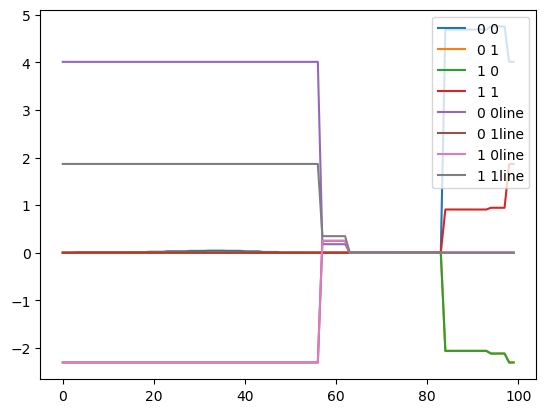

In [155]:
plt.figure()
for i in range(2):
    for j in range(2):
        plt.plot(covslists[-1,:,i,j],label=str(i)+" "+str(j))
for i in range(2):
    for j in range(2):
        plt.plot(covslistsline[-1,:,i,j],label=str(i)+" "+str(j)+"line")
plt.legend()
plt.show()

In [158]:
vals = np.polyfit(np.arange(0,100),covslists[-1,:,0,0],2)
print(vals)

[ 0.00124687 -0.08652357  0.93923866]


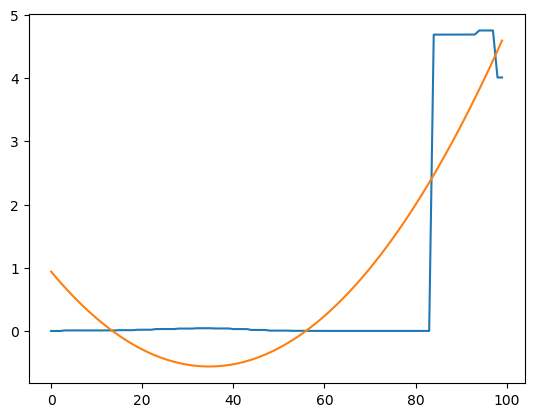

In [159]:
plt.figure()
plt.plot(covslists[-1,:,0,0])
plt.plot(np.arange(0,100),vals[0]*np.arange(0,100)**2 + \
                          vals[1]*np.arange(0,100) + \
                          vals[2])
plt.show()

[-4.27160455e-04 -1.65646096e-02  4.51917318e+00]


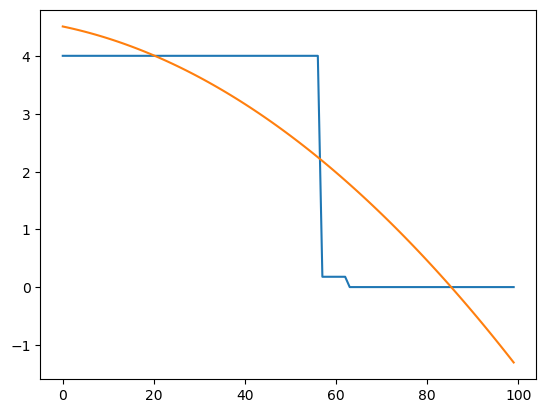

In [160]:
vals = np.polyfit(np.arange(0,100),covslistsline[-1,:,0,0],2)
print(vals)
plt.figure()
plt.plot(covslistsline[-1,:,0,0])
plt.plot(np.arange(0,100),vals[0]*np.arange(0,100)**2 + \
                          vals[1]*np.arange(0,100) + \
                          vals[2])
plt.show()